In [1]:
import sys
import os
sys.path.insert(0, os.path.dirname(os.getcwd()))
from config import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Try a reasonable set of hps

In [2]:
clf = AdaBoostClassifier()    # default tree is a stump, DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

## Learning curve

mean: 0.7577933559636042
std: 0.014750311171794055


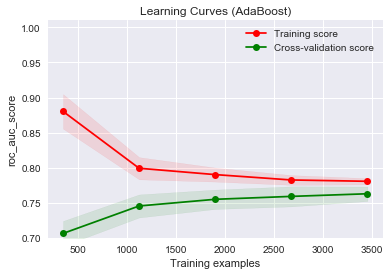

In [3]:
title = "Learning Curves (AdaBoost)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4)

# cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(clf, X_train, y_train, scoring=make_scorer(roc_auc_score), cv=cv, n_jobs=4)
# print(scores)
print(f'mean: {scores.mean()}')
print(f'std: {scores.std()}')

# analysis
# this is underfitting

## Model complexity curve

41


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

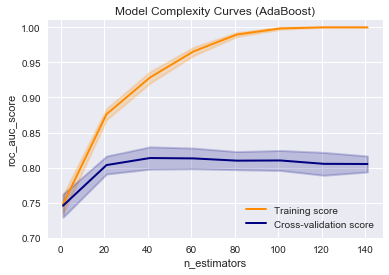

In [6]:
title = "Model Complexity Curves (AdaBoost)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
dst = DecisionTreeClassifier(max_depth=3, min_samples_split=0.0001, min_samples_leaf=0.0001, criterion='entropy')
clf = AdaBoostClassifier(base_estimator=dst, learning_rate=1)
plot_validation_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4, param_name='n_estimators', param_range=np.arange(1, 150, 20))

## Model Selection

In [ ]:
params = {'base_estimator__max_depth': np.arange(1, 15, 2), 
          'base_estimator__criterion': ['gini', 'entropy'],
          'n_estimators': np.arange(40, 150, 10)
         }
dst = DecisionTreeClassifier()
clf = AdaBoostClassifier(base_estimator=dst, learning_rate=1)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
gs = GridSearchCV(clf, params, scoring=make_scorer(roc_auc_score), cv=cv)
gs.fit(X_train, y_train)

In [ ]:
gs.grid_scores_

In [47]:
gs.best_params_

{'base_estimator__max_depth': 13, 'n_estimators': 130}

In [48]:
gs.best_score_

0.8858248843923855

## Re-plot learning curve

mean: 0.8889605404382085
std: 0.008123372197692436


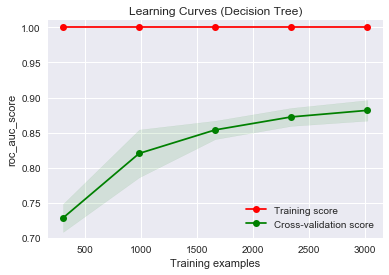

In [49]:
dst = DecisionTreeClassifier(max_depth=13)
clf = AdaBoostClassifier(base_estimator=dst, n_estimators=130, learning_rate=1)
clf.fit(X_train, y_train)

title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4)

# cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(clf, X_train, y_train, scoring=make_scorer(roc_auc_score), cv=cv, n_jobs=4)
# print(scores)
print(f'mean: {scores.mean()}')
print(f'std: {scores.std()}')

In [20]:
dst = DecisionTreeClassifier()
clf = AdaBoostClassifier(base_estimator=dst)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

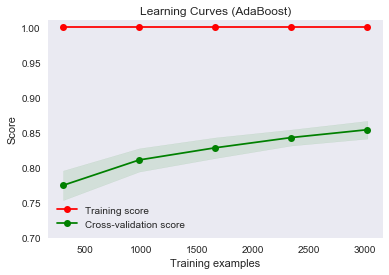

In [21]:
title = "Learning Curves (AdaBoost)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

In [5]:
dst = DecisionTreeClassifier(max_depth=5)     # prun more aggressively
clf = AdaBoostClassifier(base_estimator=dst)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

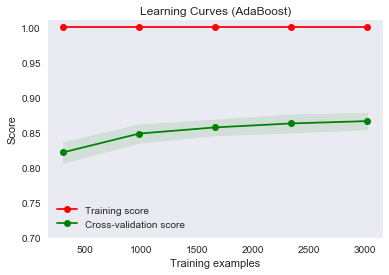

In [6]:
title = "Learning Curves (AdaBoost)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

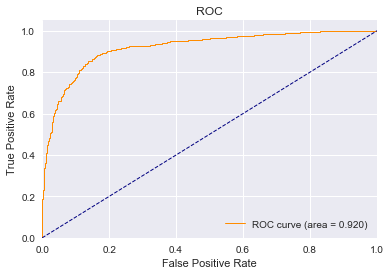

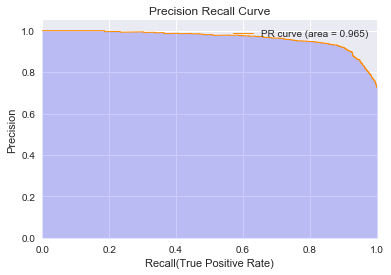

In [7]:
# plot - ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# plot - PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = average_precision_score(y_test, y_prob[:, 1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=1, label='PR curve (area = %0.3f)' % pr_auc)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="upper right")

In [ ]:
# Tuning: n_estimators, learning_rate, tree-specific hps
